In [1]:
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle

In [2]:
data = pd.read_csv('./data/mlb-pitches.csv')
data.drop(columns = ['Unnamed: 0'], inplace = True) 

pd.set_option('max_columns', None)
print(data.shape)
data.head(3)

(709851, 86)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,plate_-x,pfx_-x
0,FF,2021-10-03,92.3,1.40,6.80,"Smith, Will",596019,519293,field_out,hit_into_play,1.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,X,5.0,ground_ball,1,2,2021,8.28,16.56,-0.69,2.83,NaN,NaN,NaN,2,9,Top,77.54,155.31,518595.0,-6.833043,-134.166485,-7.361843,9.708393,26.562803,-14.083224,3.32,1.51,13.0,95.2,-13.0,92.8,2330.0,6.5,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.03,0.174,0.158,0.0,1.0,0.0,0.0,2.0,61,4,4-Seam Fastball,5,0,0,5,0,5,0,5,Infield shift,Strategic,148.0,0.0,-0.073,0.69,-8.28
1,SL,2021-10-03,80.6,1.60,6.64,"Smith, Will",596019,519293,NaN,foul,4.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,S,NaN,NaN,1,1,2021,-9.24,5.76,-0.71,2.62,NaN,NaN,NaN,2,9,Top,NaN,NaN,518595.0,-3.700232,-117.430885,-3.266842,-6.531123,19.793390,-27.369114,3.32,1.51,108.0,75.3,75.0,81.2,2254.0,6.4,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,3,Slider,5,0,0,5,0,5,0,5,Infield shift,Strategic,315.0,0.0,-0.027,0.71,9.24
2,CU,2021-10-03,75.5,1.46,6.88,"Smith, Will",596019,519293,NaN,foul,5.0,"Francisco Lindor grounds out, third baseman Eh...",R,R,L,ATL,NYM,S,NaN,NaN,1,0,2021,-7.80,-6.12,-0.04,2.46,NaN,NaN,NaN,2,9,Top,NaN,NaN,518595.0,-1.977183,-109.901781,-1.155694,-4.872924,20.602334,-36.262184,3.32,1.51,157.0,83.5,65.0,75.2,1940.0,6.2,632254,519293,518595.0,663586.0,645277.0,501303.0,606115.0,592696.0,628338.0,594807.0,54.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,2,Curveball,5,0,0,5,0,5,0,5,Infield shift,Standard,328.0,0.0,-0.020,0.04,7.80


In [3]:
# Stroman
stro = data.loc[data['player_name'] == 'Stroman, Marcus'].copy()
stro_hit = stro.loc[stro['description'] == 'hit_into_play'].copy()
stro_sw = stro.loc[stro['description'] == 'swinging_strike'].copy()
# Sinker
stro_si = stro.loc[stro['pitch_type'] == 'SI'].copy()
stro_si_sw = stro_si.loc[stro_si['description'] == 'swinging_strike'].copy()
stro_si_hit = stro_si.loc[stro_si['description'] == 'hit_into_play'].copy()
# Slider
stro_sl = stro.loc[stro['pitch_type'] == 'SL'].copy()
stro_sl_sw = stro_sl.loc[stro_sl['description'] == 'swinging_strike'].copy()
stro_sl_hit = stro_sl.loc[stro_sl['description'] == 'hit_into_play'].copy()
# Split-Finger
stro_fs = stro.loc[stro['pitch_type'] == 'FS'].copy()
stro_fs_sw = stro_fs.loc[stro_fs['description'] == 'swinging_strike'].copy()
stro_fs_hit = stro_fs.loc[stro_fs['description'] == 'hit_into_play'].copy()
# Cutter
stro_fc = stro.loc[stro['pitch_type'] == 'FC'].copy()
stro_fc_sw = stro_fc.loc[stro_fc['description'] == 'swinging_strike'].copy()
stro_fc_hit = stro_fc.loc[stro_fc['description'] == 'hit_into_play'].copy()
# 4-Seam Fastball
stro_ff = stro.loc[stro['pitch_type'] == 'FF'].copy()
stro_ff_sw = stro_ff.loc[stro_ff['description'] == 'swinging_strike'].copy()
stro_ff_hit = stro_ff.loc[stro_ff['description'] == 'hit_into_play'].copy()

# Hendricks
hendricks = data.loc[data['player_name'] == 'Hendricks, Kyle'].copy()
hendricks_hit = hendricks.loc[hendricks['description'] == 'hit_into_play'].copy()
hendricks_sw = hendricks.loc[hendricks['description'] == 'swinging_strike'].copy()
# Sinker
hendricks_si = hendricks.loc[hendricks['pitch_type'] == 'SI'].copy()
hendricks_si_sw = hendricks_si.loc[hendricks_si['description'] == 'swinging_strike'].copy()
hendricks_si_hit = hendricks_si.loc[hendricks_si['description'] == 'hit_into_play'].copy()
# Change
hendricks_ch = hendricks.loc[hendricks['pitch_type'] == 'CH'].copy()
hendricks_ch_sw = hendricks_ch.loc[hendricks_ch['description'] == 'swinging_strike'].copy()
hendricks_ch_hit = hendricks_ch.loc[hendricks_ch['description'] == 'hit_into_play'].copy()
# 4-Seam Fastball
hendricks_ff = hendricks.loc[hendricks['pitch_type'] == 'FF'].copy()
hendricks_ff_sw = hendricks_ff.loc[hendricks_ff['description'] == 'swinging_strike'].copy()
hendricks_ff_hit = hendricks_ff.loc[hendricks_ff['description'] == 'hit_into_play'].copy()
# Curveball
hendricks_cu = hendricks.loc[hendricks['pitch_type'] == 'CU'].copy()
hendricks_cu_sw = hendricks_cu.loc[hendricks_cu['description'] == 'swinging_strike'].copy()
hendricks_cu_hit = hendricks_cu.loc[hendricks_cu['description'] == 'hit_into_play'].copy()

In [4]:
hendricks.pitch_name.value_counts()

Sinker             1199
Changeup            780
4-Seam Fastball     501
Curveball           329
Name: pitch_name, dtype: int64

In [5]:
stro.pitch_name.value_counts()

Sinker             1159
Slider              624
Split-Finger        443
Cutter              423
4-Seam Fastball      72
Curveball            20
Name: pitch_name, dtype: int64

In [6]:
font_title = {
    'size': 12,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

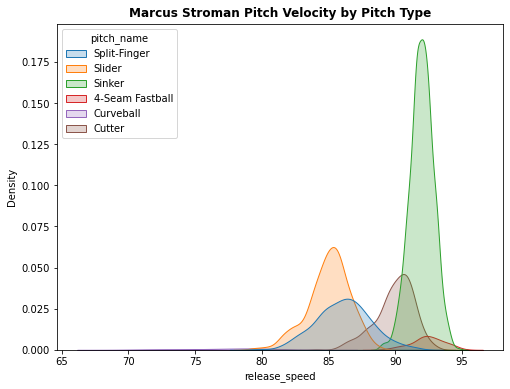

In [7]:
plt.figure(figsize = (8, 6))

ax = sns.kdeplot(data = stro, x = 'release_speed', hue = 'pitch_name', fill = True, palette = 'tab10')
sns.move_legend(ax, 'upper left')
plt.title('Marcus Stroman Pitch Velocity by Pitch Type', fontdict = font_title, pad = 12);

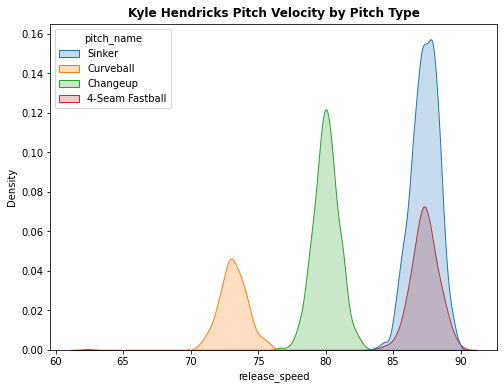

In [8]:
plt.figure(figsize = (8, 6))

ax = sns.kdeplot(data = hendricks, x = 'release_speed', hue = 'pitch_name', fill = True, palette = 'tab10')
sns.move_legend(ax, 'upper left')
plt.title('Kyle Hendricks Pitch Velocity by Pitch Type', fontdict = font_title, pad = 12);

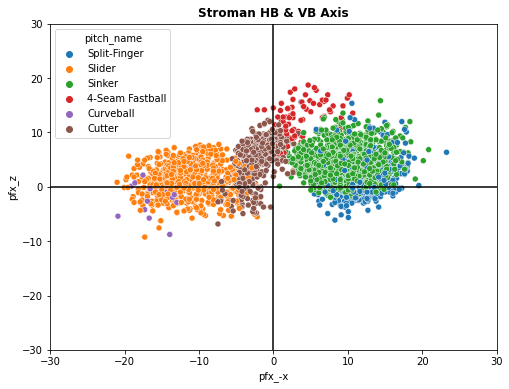

In [9]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = stro, x = 'pfx_-x', y = 'pfx_z', hue = 'pitch_name', palette = 'tab10')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.title('Stroman HB & VB Axis', fontdict = font_title, pad = 12);

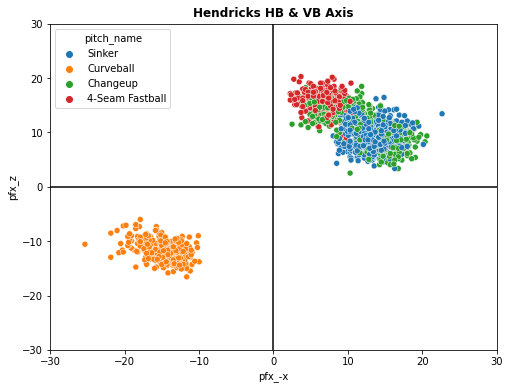

In [10]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = hendricks, x = 'pfx_-x', y = 'pfx_z', hue = 'pitch_name', palette = 'tab10')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.title('Hendricks HB & VB Axis', fontdict = font_title, pad = 12);

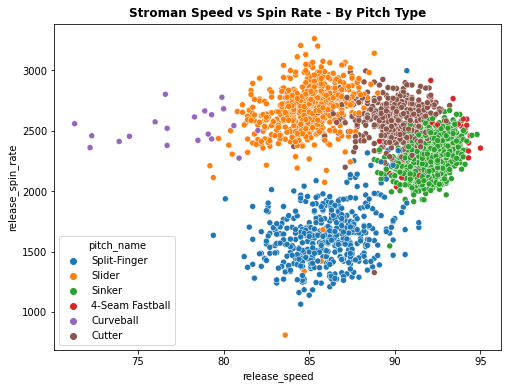

In [11]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = stro, x = 'release_speed', y = 'release_spin_rate',
                hue = 'pitch_name', palette = 'tab10')
plt.title('Stroman Speed vs Spin Rate - By Pitch Type', fontdict = font_title, pad = 12);

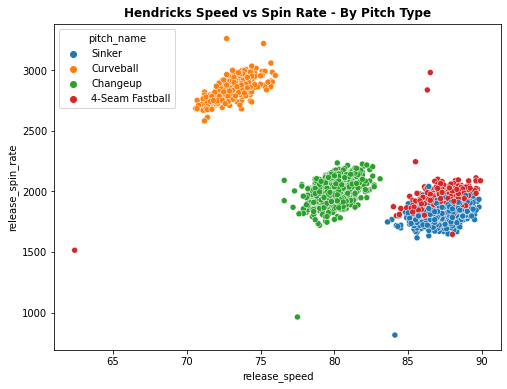

In [12]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = hendricks, x = 'release_speed', y = 'release_spin_rate',
                hue = 'pitch_name', palette = 'tab10')
plt.title('Hendricks Speed vs Spin Rate - By Pitch Type', fontdict = font_title, pad = 12);

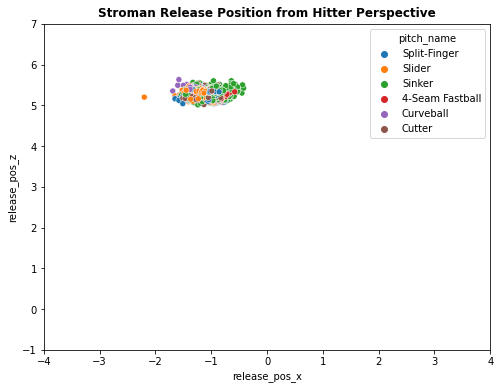

In [13]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = stro, x = 'release_pos_x', y = 'release_pos_z', 
                hue = 'pitch_name', palette = 'tab10')
plt.xlim(-4, 4)
plt.ylim(-1, 7)
plt.title('Stroman Release Position from Hitter Perspective', fontdict = font_title, pad = 12);

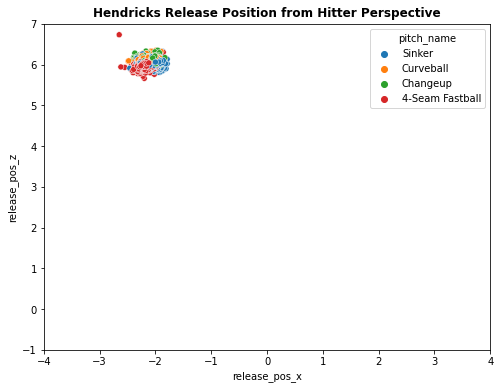

In [14]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = hendricks, x = 'release_pos_x', y = 'release_pos_z', 
                hue = 'pitch_name', palette = 'tab10')
plt.xlim(-4, 4)
plt.ylim(-1, 7)
plt.title('Hendricks Release Position from Hitter Perspective', fontdict = font_title, pad = 12);

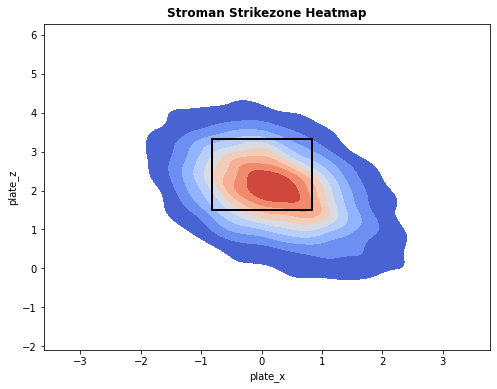

In [15]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = stro, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height, 
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.title('Stroman Strikezone Heatmap', fontdict = font_title, pad = 12);

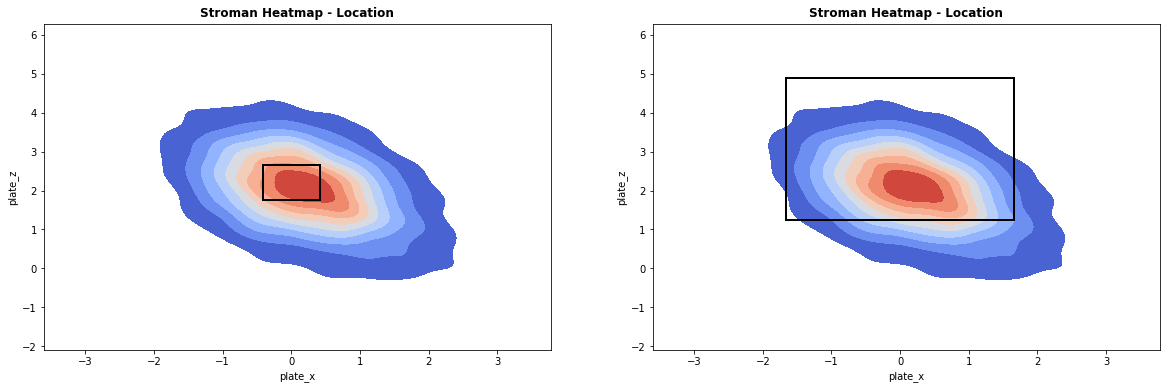

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.kdeplot(ax = ax[0], data = stro, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[0].add_patch(Rectangle((-.415, 1.75), .83, .91, fill = False, color = 'black', linewidth = 2))
ax[0].set_title('Stroman Heatmap - Location', font_title, pad = 12)

sns.kdeplot(ax = ax[1], data = stro, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[1].add_patch(Rectangle((-1.66, 1.25), 3.32, 3.64, fill = False, color = 'black', linewidth = 2))
ax[1].set_title('Stroman Heatmap - Location', font_title, pad = 12);

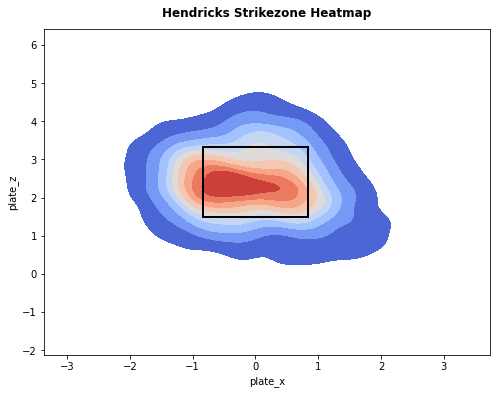

In [17]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = hendricks, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height, 
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.title('Hendricks Strikezone Heatmap', fontsize = 12, fontweight = 'bold', pad = 12);

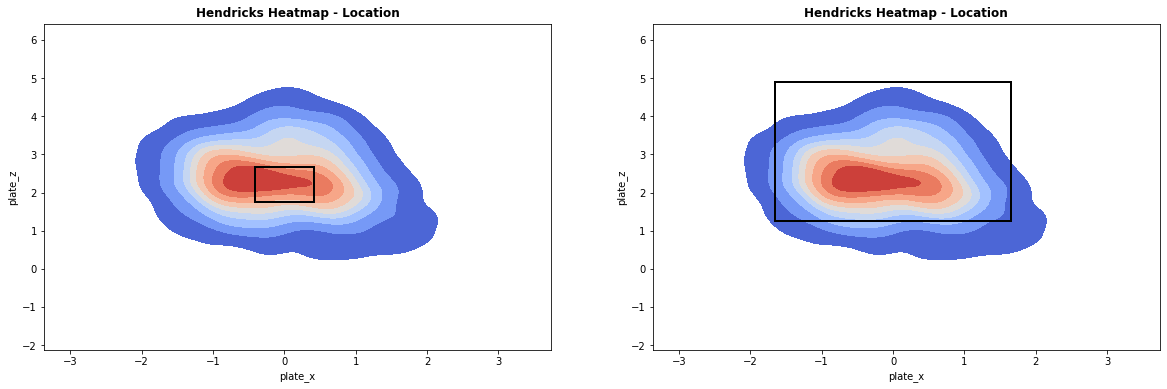

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.kdeplot(ax = ax[0], data = hendricks, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[0].add_patch(Rectangle((-.415, 1.75), .83, .91, fill = False, color = 'black', linewidth = 2))
ax[0].set_title('Hendricks Heatmap - Location', font_title, pad = 12)

sns.kdeplot(ax = ax[1], data = hendricks, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[1].add_patch(Rectangle((-1.66, 1.25), 3.32, 3.64, fill = False, color = 'black', linewidth = 2))
ax[1].set_title('Hendricks Heatmap - Location', font_title, pad = 12);

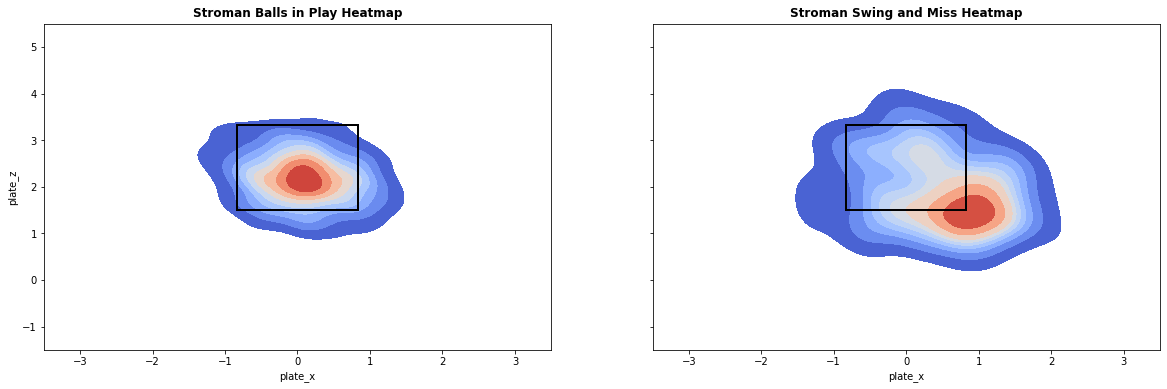

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6), sharex = True, sharey = True)

sns.kdeplot(ax = ax[0], data = stro_hit, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[0].axis(xmin = -3.5, xmax = 3.5)
ax[0].axis(ymin = -1.5, ymax = 5.5)
ax[0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[0].set_title('Stroman Balls in Play Heatmap', font_title, pad = 12)

sns.kdeplot(ax = ax[1], data = stro_sw, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[1].set_title('Stroman Swing and Miss Heatmap', font_title, pad = 12);

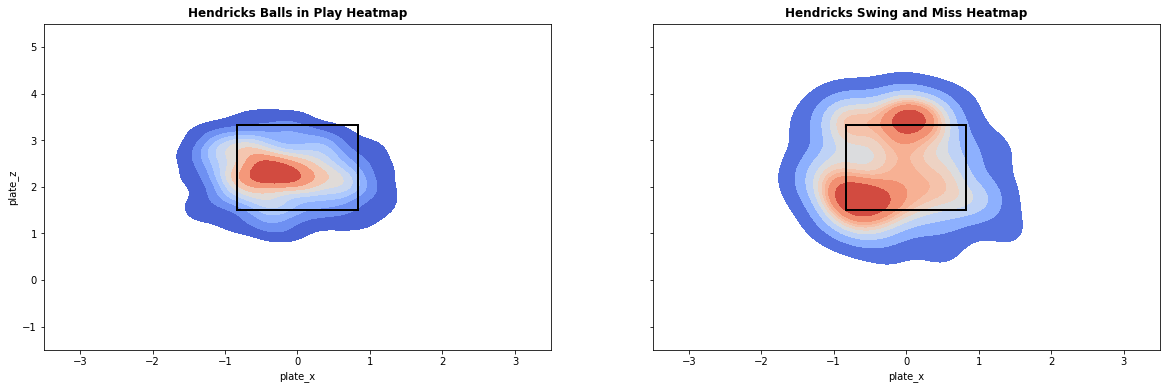

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6), sharex = True, sharey = True)

sns.kdeplot(ax = ax[0], data = hendricks_hit, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[0].axis(xmin = -3.5, xmax = 3.5)
ax[0].axis(ymin = -1.5, ymax = 5.5)
ax[0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[0].set_title('Hendricks Balls in Play Heatmap', font_title, pad = 12)

sns.kdeplot(ax = ax[1], data = hendricks_sw, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[1].set_title('Hendricks Swing and Miss Heatmap', font_title, pad = 12);

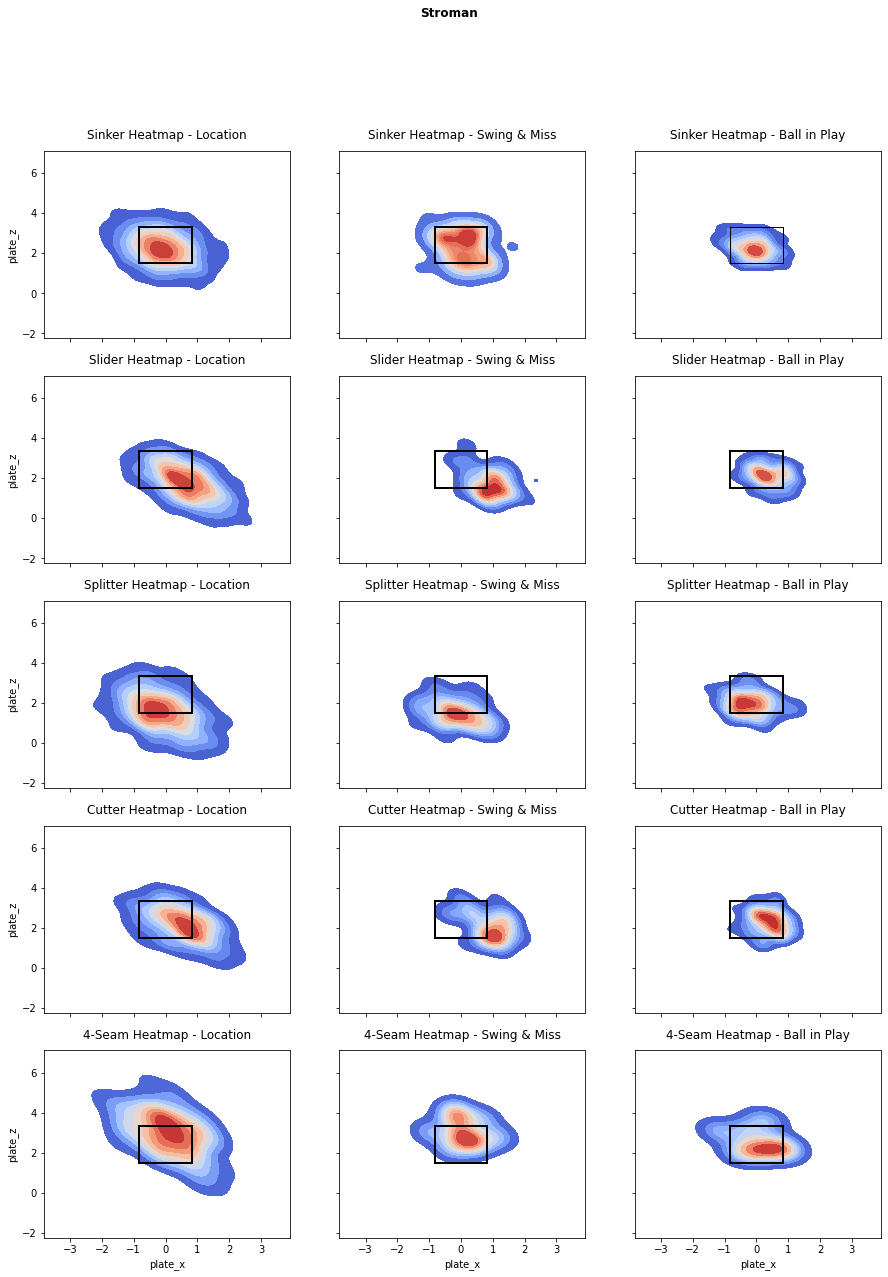

In [21]:
fig, ax = plt.subplots(5, 3, figsize = (15, 20), sharex = True, sharey = True)
fig.suptitle('Stroman', ha = 'center', va = 'top', fontsize = 12, fontweight = 'bold')

sns.kdeplot(ax = ax[0][0], data = stro_si, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[0][0].set_title('Sinker Heatmap - Location', pad = 12)
sns.kdeplot(ax = ax[0][1], data = stro_si_sw, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[0][1].set_title('Sinker Heatmap - Swing & Miss', pad = 12)
sns.kdeplot(ax = ax[0][2], data = stro_si_hit, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black'))
ax[0][2].set_title('Sinker Heatmap - Ball in Play', pad = 12)
sns.kdeplot(ax = ax[1][0], data = stro_sl, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[1][0].set_title('Slider Heatmap - Location', pad = 12)
sns.kdeplot(ax = ax[1][1], data = stro_sl_sw, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[1][1].set_title('Slider Heatmap - Swing & Miss', pad = 12)
sns.kdeplot(ax = ax[1][2], data = stro_sl_hit, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[1][2].set_title('Slider Heatmap - Ball in Play', pad = 12)
sns.kdeplot(ax = ax[1][0], data = stro_sl, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[1][0].set_title('Slider Heatmap - Location', pad = 12)
sns.kdeplot(ax = ax[2][0], data = stro_fs, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[2][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[2][0].set_title('Splitter Heatmap - Location', pad = 12)
sns.kdeplot(ax = ax[2][1], data = stro_fs_sw, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[2][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[2][1].set_title('Splitter Heatmap - Swing & Miss', pad = 12)
sns.kdeplot(ax = ax[2][2], data = stro_fs_hit, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[2][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[2][2].set_title('Splitter Heatmap - Ball in Play', pad = 12)
sns.kdeplot(ax = ax[3][0], data = stro_fc, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[3][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[3][0].set_title('Cutter Heatmap - Location', pad = 12)
sns.kdeplot(ax = ax[3][1], data = stro_fc_sw, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[3][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[3][1].set_title('Cutter Heatmap - Swing & Miss', pad = 12)
sns.kdeplot(ax = ax[3][2], data = stro_fc_hit, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[3][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[3][2].set_title('Cutter Heatmap - Ball in Play', pad = 12)
sns.kdeplot(ax = ax[4][0], data = stro_ff, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[4][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[4][0].set_title('4-Seam Heatmap - Location', pad = 12)
sns.kdeplot(ax = ax[4][1], data = stro_ff_sw, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[4][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[4][1].set_title('4-Seam Heatmap - Swing & Miss', pad = 12)
sns.kdeplot(ax = ax[4][2], data = stro_ff_hit, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[4][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[4][2].set_title('4-Seam Heatmap - Ball in Play', pad = 12);

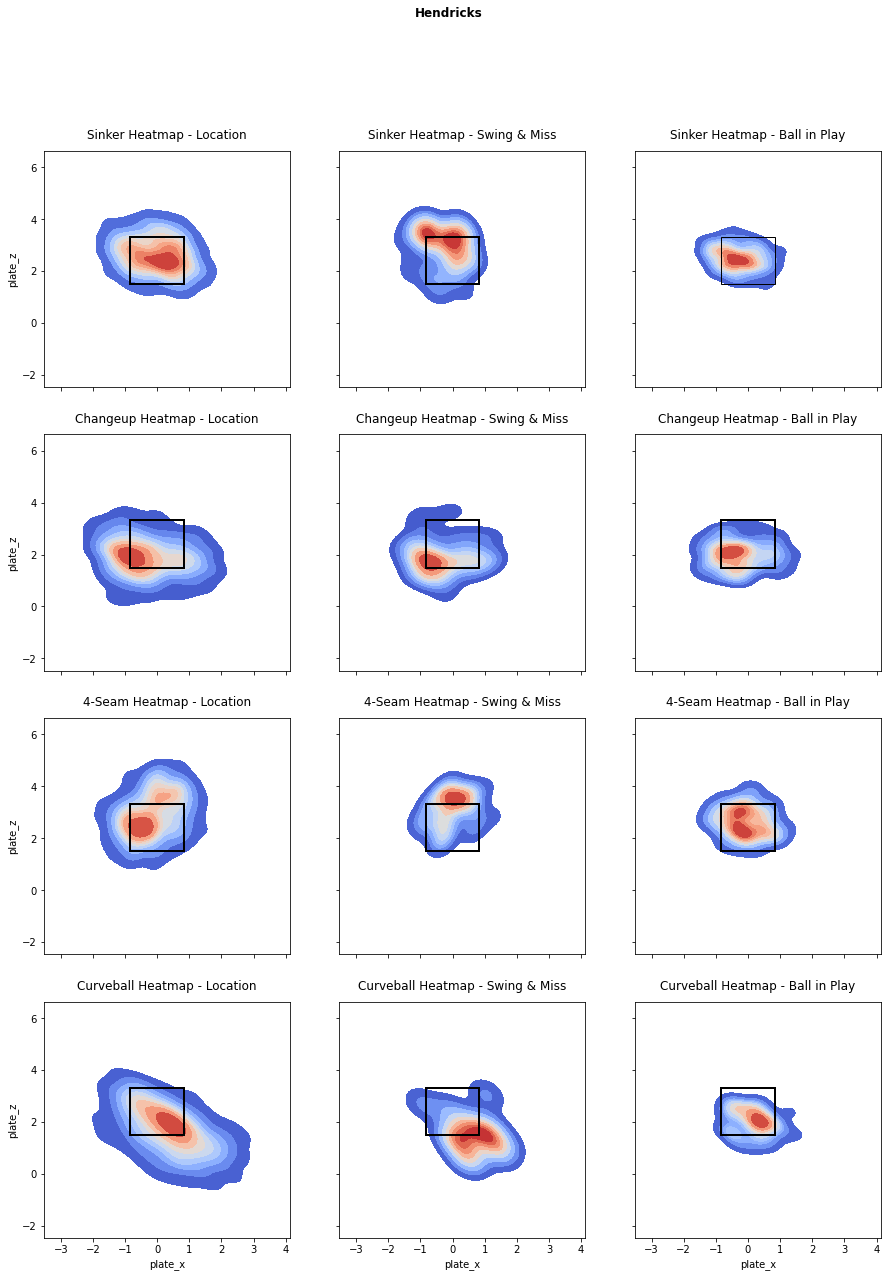

In [22]:
fig, ax = plt.subplots(4, 3, figsize = (15, 20), sharex = True, sharey = True)
fig.suptitle('Hendricks', ha = 'center', va = 'top', fontsize = 12, fontweight = 'bold')

sns.kdeplot(ax = ax[0][0], data = hendricks_si, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[0][0].set_title('Sinker Heatmap - Location', pad = 12)
sns.kdeplot(ax = ax[0][1], data = hendricks_si_sw, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[0][1].set_title('Sinker Heatmap - Swing & Miss', pad = 12)
sns.kdeplot(ax = ax[0][2], data = hendricks_si_hit, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black'))
ax[0][2].set_title('Sinker Heatmap - Ball in Play', pad = 12)
sns.kdeplot(ax = ax[1][0], data = hendricks_ch, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[1][0].set_title('Changeup Heatmap - Location', pad = 12)
sns.kdeplot(ax = ax[1][1], data = hendricks_ch_sw, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[1][1].set_title('Changeup Heatmap - Swing & Miss', pad = 12)
sns.kdeplot(ax = ax[1][2], data = hendricks_ch_hit, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[1][2].set_title('Changeup Heatmap - Ball in Play', pad = 12)
sns.kdeplot(ax = ax[2][0], data = hendricks_ff, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[2][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[2][0].set_title('4-Seam Heatmap - Location', pad = 12)
sns.kdeplot(ax = ax[2][1], data = hendricks_ff_sw, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[2][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[2][1].set_title('4-Seam Heatmap - Swing & Miss', pad = 12)
sns.kdeplot(ax = ax[2][2], data = hendricks_ff_hit, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[2][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[2][2].set_title('4-Seam Heatmap - Ball in Play', pad = 12)
sns.kdeplot(ax = ax[3][0], data = hendricks_cu, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[3][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[3][0].set_title('Curveball Heatmap - Location', pad = 12)
sns.kdeplot(ax = ax[3][1], data = hendricks_cu_sw, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[3][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[3][1].set_title('Curveball Heatmap - Swing & Miss', pad = 12)
sns.kdeplot(ax = ax[3][2], data = hendricks_cu_hit, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
ax[3][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
ax[3][2].set_title('Curveball Heatmap - Ball in Play', pad = 12);